In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf

In [2]:
# import sys
# sys.path.append("/home/tyabuta/.local/lib/python3.8/site-packages")
# import recourse as rs

In [3]:
import sys
from pathlib import Path

home = str(Path.home())
sys.path.append(home + "/dsc180/DSC180A-Credit-Scoring/actionable-recourse")
import actionable_recourse as rs

In [4]:
# import importlib
# importlib.import_module("/home/tyabuta/dsc180/DSC180A-Credit-Scoring/actionable-recourse")

# Sample code to use the Model Class

The following is the same code as in train.py. You can change the dataset name for experimentations.

Loaded give_me_credit dataset
Training LogisticRegression(penalty='none', random_state=0)...


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the model on test set: 0.9319447908871705


/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


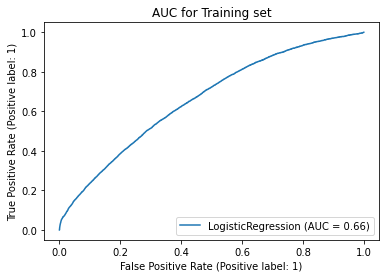

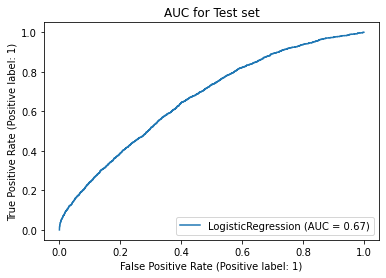

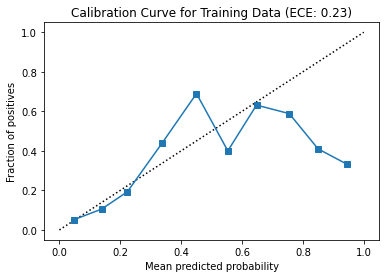

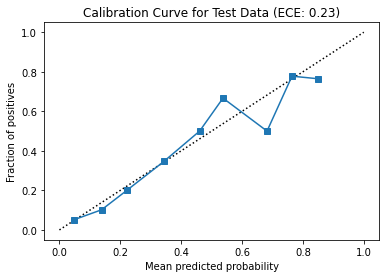

In [5]:
from model import Model
from sklearn.linear_model import LogisticRegression

# Set the dataset name
name = "give_me_credit"

model = Model(name)
# Set the model
clf = LogisticRegression(random_state=0, penalty="none")
model.train(clf)
# Plot the performance
model.plot_clf()

# Actionable-Recourse

https://github.com/ustunb/actionable-recourse

In [16]:
from sklearn.linear_model import LogisticRegression

# import data
url = 'https://raw.githubusercontent.com/ustunb/actionable-recourse/master/examples/paper/data/credit_processed.csv'
df = pd.read_csv(url)
y, X = df.iloc[:, 0].head(100), df.iloc[:, 1:].head(100)

# train a classifier
clf = LogisticRegression(max_iter = 1000)
clf.fit(X, y)
yhat = clf.predict(X)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from joblib import dump, load

model_path = '../../models/actionable-recourse_sample_logistic_regression.joblib'
dump(clf, model_path) 

['../../models/actionable-recourse_sample_logistic_regression.joblib']

In [18]:
# import sys
# from pathlib import Path

# home = str(Path.home())
# sys.path.append(home + "/dsc180/DSC180A-Credit-Scoring")
# import actionable_recourse as rs

In [19]:
# from pathlib import Path

# home = str(Path.home())

In [11]:
# import importlib
# import sys

# spec = importlib.util.spec_from_file_location("actionable-recourse", home + "/dsc180/DSC180A-Credit-Scoring/actionable-recourse")
# rs = importlib.util.module_from_spec(spec)

In [10]:
import sys
from pathlib import Path

home = str(Path.home())
sys.path.append(home + "/dsc180/DSC180A-Credit-Scoring/actionable-recourse")
sys.path.append(home + "/.local/lib/python3.8/site-packages")
import recourse as rs

In [13]:
from joblib import dump, load

clf = load('../../models/actionable-recourse_sample_logistic_regression.joblib') 

In [24]:
import seaborn as sns
import numpy as np

# X is the data to audit on
def print_recourse_audit_report(X, audit_df, y, group_by = ['y']):

    processed_data = (audit_df
                            .merge(X, right_index=True, left_index=True)
                            .merge(y.to_frame('y'), right_index=True, left_index=True)
                            .replace([np.inf, -np.inf], np.nan)
#                             .dropna()
                           )
#     We run the audit for everyone where \hat{Y}=0.
#     We break down these people by the true value of Y.
#     For each group defined by Y = (0, 1). For, Y = we want to know:
#     (0) how many people are in the group
#     (1) how many group members have recourse
#     (2) what is the distribution of the cost of recourse amost those with recourse
#     more generally, we'll want the function to take in different ways to slice and dice the population into mutually exclusive groups, one variable that can be used to do that is just "Y", but you could also do it by Age Group, etc.

#     rows that already attain desired outcome have entries: feasible = NaN & cost = NaN
#     rows that are certified to have no recourse have entries: feasible = False & cost = Inf`

    # DELIVERABLES

    print("Stats: ")
    print("Audit Dataset Size: %s"%(processed_data.shape[0]))

    y_val = list(set(y))
    for y in y_val:
        subset_data_and_plot(y, processed_data)
    
    # assuming that the other inputs are categorial variables
    if len(group_by)>1:
        for i in range(1, len(group_by)):
            for y in y_val:
                print(group_by[i])
                subset_data_and_plot(y, processed_data, group_by=[group_by[i]])

def subset_data_and_plot(y, data, group_by = ['y']):

        # individuals who already have the desired outcome
        df1 = data.loc[(data['y'] == y) &
                       (data['feasible'].isnull()) &
                       (data['cost'].isnull())]
        print(
            "Number of datapoints that have Y=%s and already have the desired outcome: %s" % (
            y, df1.shape[0]))

        # individuals who are certified to have no recourse
        df2 = data.loc[
            (data['y'] == y) &
            (data['feasible'] == False) &
            (np.isfinite(data['cost']))]
        print(
            "Number of datapoints that have Y=%s and DO NOT have recourse: %s" % (
            y, df2.shape[0]))

        # individuals who have feasible cost of recourse
        df3 = data.loc[(data['y'] == y) &
                       (data['feasible'] == True)]

        print(df3[['cost'] + group_by].groupby(group_by).agg(
                ['mean', 'median', 'count']))
        print(df3[['feasible'] + group_by].groupby(group_by).agg(['count']))

        sns.set_context("paper",
                        rc = {
                            "font.size": 15, "axes.titlesize": 10,
                            "axes.labelsize": 15})

        if group_by[0] == 'y':
            sns.histplot(df3['cost']).set(
                title = 'Histogram of Cost of Recourse for Y=%s' % (y),
                xlabel = 'Cost',
                ylabel = 'Counts')

        else:
            sns.violinplot(
                    x = group_by[0], y = 'cost',
                    data = df3,
                    linewidth = 0.5, cut = 0,
                    scale = 'width', color = "lightskyblue",
                    inner = 'quartile').set(
                title = "Histogram of Cost of Recourse by %s for Y=%s" % (
                group_by[0], y), xlabel = group_by[0])

        plt.show()

obtained 10 items in 0.2 seconds


  0%|          | 0/16 [00:00<?, ?it/s]

1.0
0.06320927531389144
Stats: 
Audit Dataset Size: 100
Number of datapoints that have Y=0.0 and already have the desired outcome: 15
Number of datapoints that have Y=0.0 and DO NOT have recourse: 0
        cost                
        mean    median count
y                           
0.0  0.06327  0.066608    11
    feasible
       count
y           
0.0       11


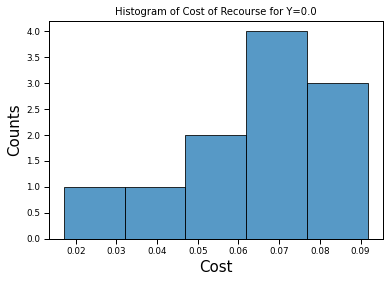

Number of datapoints that have Y=1.0 and already have the desired outcome: 69
Number of datapoints that have Y=1.0 and DO NOT have recourse: 0
         cost                
         mean    median count
y                            
1.0  0.063076  0.050026     5
    feasible
       count
y           
1.0        5


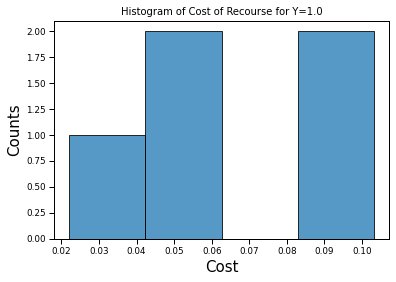

In [26]:
# customize the set of actions
A = rs.ActionSet(X)  ## matrix of features. ActionSet will set bounds and step sizes by default

# specify immutable variables
A['Married'].mutable = False

# can only specify properties for multiple variables using a list
for col in ['Age_lt_25', 'Age_in_25_to_40', 'Age_in_40_to_59', 'Age_geq_60']:
    A[col].mutable = False

# education level
A['EducationLevel'].step_direction = 1  ## force conditional immutability.
A['EducationLevel'].step_size = 1  ## set step-size to a custom value.
A['EducationLevel'].step_type = "absolute"  ## force conditional immutability.
A['EducationLevel'].bounds = (0, 3)

A['TotalMonthsOverdue'].step_size = 1  ## set step-size to a custom value.
A['TotalMonthsOverdue'].step_type = "absolute"  ## discretize on absolute values of feature rather than percentile values
A['TotalMonthsOverdue'].bounds = (0, 100)  ## set bounds to a custom value.

## get model coefficients and align
# A.align(clf)  ## tells `ActionSet` which directions each feature should move in to produce positive change.

# Get one individual
i = np.flatnonzero(yhat <= 0).astype(int)[0]

# build a flipset for one individual
fs = rs.Flipset(x = X.values[i], action_set = A, clf = clf)
fs.populate(enumeration_type = 'distinct_subsets', total_items = 10)
fs.to_latex()
fs.to_html()

# Run Recourse Audit on Training Data
auditor = rs.RecourseAuditor(A, coefficients = clf.coef_, intercept = clf.intercept_)
audit_df = auditor.audit(X)  ## matrix of features over which we will perform the audit.

## print mean feasibility and cost of recourse
print(audit_df['feasible'].mean())
print(audit_df['cost'].mean())
print_recourse_audit_report(X, audit_df, y)
# or produce additional information of cost of recourse by other variables
# print_recourse_audit_report(X, audit_df, y, group_by = ['y', 'Married', 'EducationLevel'])


In [27]:
audit_df

,feasible,cost
0,True,0.066608
1,True,0.050026
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN
